# EDA

In [2]:
import glob
import os
import pandas as pd
from matplotlib import pyplot as plt
from pysqldf import SQLDF
from pandasql import sqldf
import numpy as np
import datetime as dt
# from pororo import Pororo
from wordcloud import WordCloud, STOPWORDS

In [3]:
data_dir = './input/train.csv'

In [4]:
data = pd.read_csv(data_dir, parse_dates=['order_date'])
df = data.copy()

In [701]:
people = df['customer_id'].unique()

In [702]:
customer_total = df['total'].groupby(df['customer_id']).sum()

- 고객들 별 총 구매액

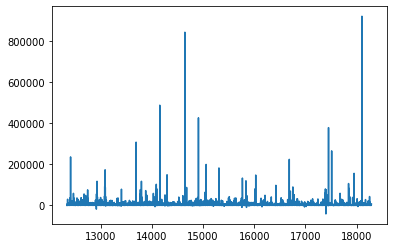

In [703]:
plt.plot(customer_total)

- 이 중에 비교적 '많이 샀다'고 판단되는 사람들을 걸러내고 싶음
- '많이 샀다'의 기준은 상위 0.001%, 6명

In [704]:
customer_total.quantile(q=0.999)

269535.63789902

In [705]:
top = customer_total[customer_total.apply(lambda x: x>customer_total.quantile(q=0.999))]

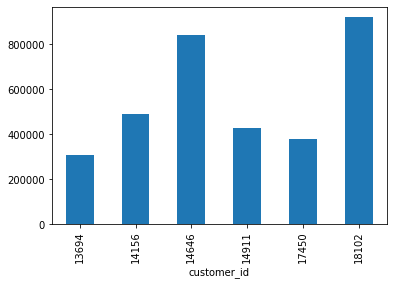

In [706]:
top.plot.bar()

In [707]:
print(df[df['customer_id'] == 18102])

       order_id product_id                        description  quantity  \
54       489438      21329            DINOSAURS  WRITING SET         28   
55       489438      21252     SET OF MEADOW  FLOWER STICKERS        30   
56       489438      21100     CHARLIE AND LOLA CHARLOTTE BAG        30   
57       489438      21033    JUMBO BAG CHARLIE AND LOLA TOYS        30   
58       489438      20711                    JUMBO BAG TOYS         60   
...         ...        ...                                ...       ...   
722383   574383      82484  WOOD BLACK BOARD ANT WHITE FINISH         1   
722384   574383      23404         HOME SWEET HOME BLACKBOARD         1   
722385   574383      23133   LARGE IVORY HEART WALL ORGANISER        12   
722386   574383      22188            BLACK HEART CARD HOLDER         2   
773997   579139      85152    HAND OVER THE CHOCOLATE   SIGN        192   

                order_date   price  customer_id         country    total  
54     2009-12-01 09:24:

# 월별 구매액

In [708]:
df

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.6100
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.3200
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.5000
...,...,...,...,...,...,...,...,...,...
780497,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,1.4025,15676,United Kingdom,-1.4025
780498,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,5.4285,15676,United Kingdom,-5.4285
780499,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,2.0625,16717,United Kingdom,-2.0625
780500,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,13.1175,16717,United Kingdom,-13.1175


In [746]:
df['year_month'] = df['order_date'].dt.strftime('%Y-%m')

In [710]:
monthly_total = df['total'].groupby(df['year_month']).sum()

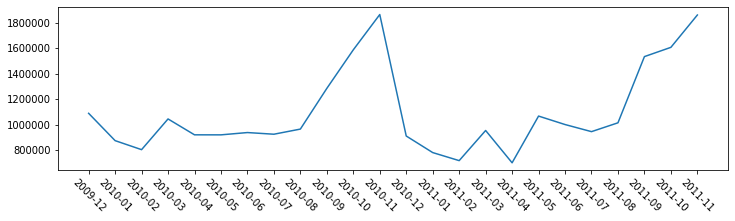

In [711]:
plt.figure(figsize=(12,3))
plt.xticks(rotation = -45)
plt.plot(monthly_total)

- 8월부터 12월까지 급격히 증가

In [712]:
data

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.6100
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.3200
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.5000
...,...,...,...,...,...,...,...,...,...
780497,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,1.4025,15676,United Kingdom,-1.4025
780498,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,5.4285,15676,United Kingdom,-5.4285
780499,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,2.0625,16717,United Kingdom,-2.0625
780500,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,13.1175,16717,United Kingdom,-13.1175


# 월별 판매상품 WordCloud

In [773]:
def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [714]:
def Clouder(year_month):
    displayWordCloud(str(df[df['year_month'] == year_month]['description']))

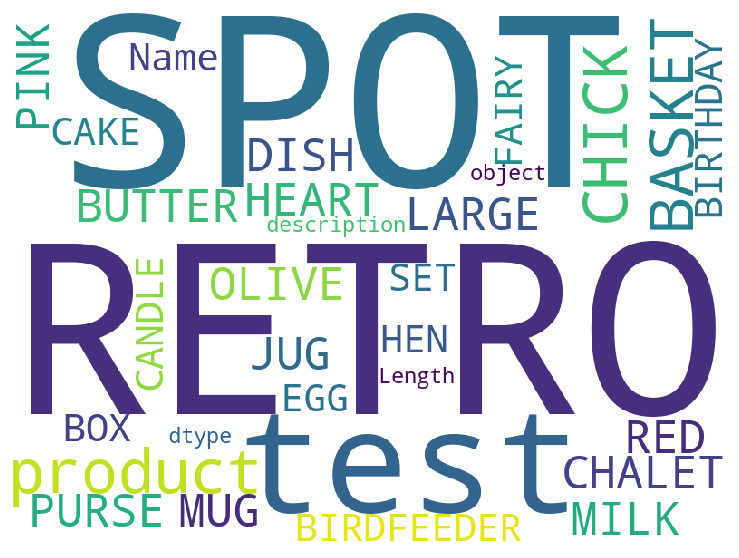

In [715]:
Clouder('2010-01')

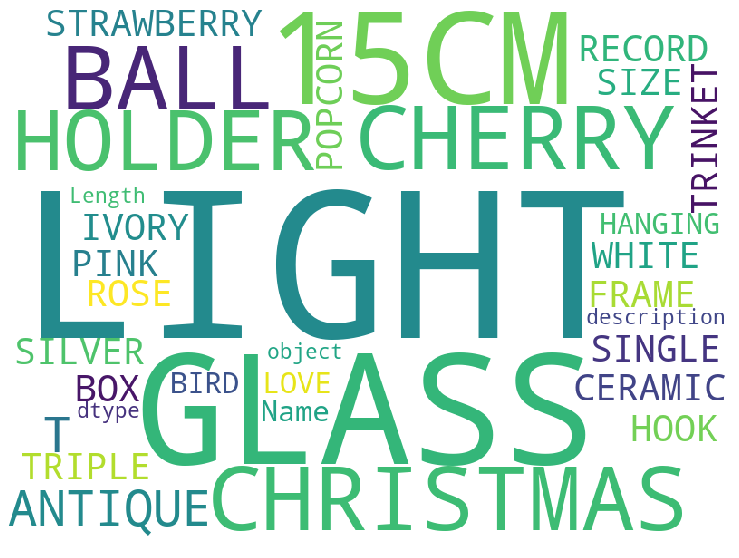

In [716]:
displayWordCloud(str(df['description']))

# order_id에서의 outlier

In [717]:
order_id_outlier = 0

for x in df['order_id'].values:
    if x.isnumeric() == False and x[0]!='C':
        order_id_outlier += 1

print(order_id_outlier)

0


- 구매냐 환불이냐 외에는 outlier가 없다.

# product_id에서의 outlier

In [764]:
product_id_outlier = 0
product_id_outlier_set = set()

for x in df['product_id'].values:
    if x[0:5].isnumeric() == True or (x[0:5].isnumeric() == True and x[-1].isalpha()):
        continue
    else:
        product_id_outlier_set.add(x)

print(product_id_outlier_set)

{'TEST001', 'POST', 'M', 'CRUK', 'TEST002', 'ADJUST', 'C2', 'ADJUST2', 'BANK CHARGES', 'D', 'DOT', 'PADS', 'SP1002'}


- 위의 outlier들 처리 필요

- 장부에 outlier만 가지고 있는 녀석들은 따로 봐줘야할 필요가 있음

In [766]:
suspect_set = set()
for outlier in product_id_outlier_set :
    suspect_list = df[df['product_id'] == outlier].customer_id.unique()
    for suspect in suspect_list :
        if len(df[df['customer_id'] == suspect]) <= 3 : # 이부분 보완 필요한데 뇌회전 멈춤;
            suspect_set.add(suspect)
print(sorted(suspect_set))

[12382, 12404, 12466, 12503, 12555, 12570, 12603, 12606, 12636, 12706, 12737, 12814, 12846, 12918, 13054, 13100, 13231, 13290, 13335, 13378, 13401, 13409, 13463, 13528, 13633, 13664, 13910, 14103, 14313, 14328, 14380, 14781, 14827, 14832, 14906, 14939, 15357, 15383, 15802, 15849, 15896, 15940, 16047, 16151, 16154, 16257, 16291, 16446, 16514, 16575, 16703, 16879, 16981, 16994, 17013, 17130, 17399, 17424, 17445, 17452, 17546, 17570, 17846, 17943, 18023, 18133]


In [720]:
# df[df['product_id'] == 'C2'].customer_id.unique()

In [769]:
df[df['customer_id'] == 14103]

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
62932,497819,TEST001,This is a test product.,5,2010-02-12 14:58:00,0.0,14103,United Kingdom,0.0


In [722]:
14103 - 13085 + 1

1019

### TEST001
- 14103은 TEST001만 있음 (테스트용 사용자로 보임 + 아이디는 유지해야할듯)
- 14827은 TEST001만 있음 (테스트용 사용자로 보임 + 아이디는 유지해야할듯)

### CRUK
- 14096에만 있음 (정상 사용자로 보임)

### ADJUST
- 직원할인 등 직원에 의해 가격이 조정된 경우로 추측 중 (대체로 정상 사용자로 보임)
- 16154,12606,13054,15383,12706,12404,12382,12466,16291,12555,12846,16575,13664,16047,17130,15357,12570 ADJUST만 있음 (비정상 사용자)

### BANK CHARGES
- 16703,

### 특이유저
- 13776 : ADJUST, BANKCHARGES,M으로만 이루어져있음
- 14380 : ADJUST, M 하나씩 있음
- 16879 : BANKCHARGES, M 하나씩 있음

# Country 종류

In [7]:
df['country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Netherlands', 'Poland',
       'Spain', 'Channel Islands', 'Italy', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland',
       'Switzerland', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon',
       'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [724]:
df

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total,year_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.6100,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.3200,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.5000,2009-12
...,...,...,...,...,...,...,...,...,...,...
780497,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,1.4025,15676,United Kingdom,-1.4025,2011-11
780498,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,5.4285,15676,United Kingdom,-5.4285,2011-11
780499,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,2.0625,16717,United Kingdom,-2.0625,2011-11
780500,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,13.1175,16717,United Kingdom,-13.1175,2011-11


# 내 가설

- 핵심 중 하나는 재구매율이다.
- 또다른 핵심은 한 사람이 구매를 할때 사용하는 돈의 액수다.
- 재구매율을 어떻게 따질 것이냐?
- 5분 내로 주문한 것들은 전부 한 주문으로 치고 다음에 또 주문했는지 확인
- customer_id와 order_id의 관계로 확인해도 될듯?

# 한 주문 당 쓴 돈

In [725]:
one_order_how_much = df['total'].groupby(df['order_id']).sum()

In [726]:
one_order_how_much

order_id
489434      833.7450
489435      240.5700
489436     1040.0445
489437      512.7375
489438     3772.2960
             ...    
C579882     -24.5025
C579883     -31.5975
C579884     -33.8745
C579886    -150.5955
C579887     -33.7425
Name: total, Length: 43955, dtype: float64

In [727]:
h=[]
for x in one_order_how_much.values:
    h.append(x)

In [728]:
h_x = [x for x in range (len(h))]

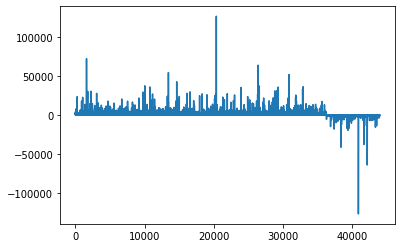

In [729]:
plt.plot(h_x,h)

In [730]:
print(len(one_order_how_much[one_order_how_much <= 0]))

7764


In [731]:
print(len(one_order_how_much[one_order_how_much < 300]))

18577


In [732]:
print(len(one_order_how_much[one_order_how_much >= 300]))

25378


# 한 달에 몇번 주문하나 보통

In [733]:
df

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total,year_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.6100,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.3200,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.5000,2009-12
...,...,...,...,...,...,...,...,...,...,...
780497,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,1.4025,15676,United Kingdom,-1.4025,2011-11
780498,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,5.4285,15676,United Kingdom,-5.4285,2011-11
780499,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,2.0625,16717,United Kingdom,-2.0625,2011-11
780500,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,13.1175,16717,United Kingdom,-13.1175,2011-11


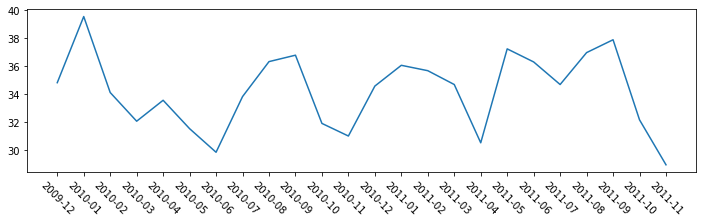

In [734]:
monthly_order = df['total'].groupby(df['year_month']).mean()
plt.figure(figsize=(12,3))
plt.xticks(rotation = -45)
plt.plot(monthly_order)

# 한 사람 당 한 달에 쓴 돈

In [735]:
def monthly_individual_total_counter(year_month):
    monthly_individual_total = df[df['year_month']==year_month].groupby('customer_id')['total'].mean()
    plt.plot(monthly_individual_total)

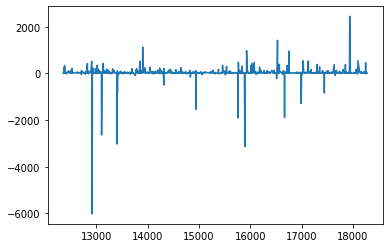

In [736]:
monthly_individual_total_counter('2010-03')

# 월 기준 재구매율

아니 이게 우리가 풀자는 문제잖아

# dataframe에서 시간의 시계열을 버리자

In [4]:
df

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.6100
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.3200
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.5000
...,...,...,...,...,...,...,...,...,...
780497,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,1.4025,15676,United Kingdom,-1.4025
780498,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,5.4285,15676,United Kingdom,-5.4285
780499,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,2.0625,16717,United Kingdom,-2.0625
780500,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,13.1175,16717,United Kingdom,-13.1175


In [5]:
df = data.copy()
df['year_month_day'] = df['order_date'].dt.strftime('%Y-%m-%d')

In [6]:
df = df.drop(['order_date'],axis=1)

In [8]:
df = df[['customer_id','year_month_day','order_id','product_id','description','quantity','price','country','total']]

In [9]:
df

,customer_id,year_month_day,order_id,product_id,description,quantity,price,country,total
0,13085,2009-12-01,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,11.4675,United Kingdom,137.6100
1,13085,2009-12-01,489434,79323P,PINK CHERRY LIGHTS,12,11.1375,United Kingdom,133.6500
2,13085,2009-12-01,489434,79323W,WHITE CHERRY LIGHTS,12,11.1375,United Kingdom,133.6500
3,13085,2009-12-01,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,3.4650,United Kingdom,166.3200
4,13085,2009-12-01,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2.0625,United Kingdom,49.5000
...,...,...,...,...,...,...,...,...,...
780497,15676,2011-11-30,C579886,22197,POPCORN HOLDER,-1,1.4025,United Kingdom,-1.4025
780498,15676,2011-11-30,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,5.4285,United Kingdom,-5.4285
780499,16717,2011-11-30,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2.0625,United Kingdom,-2.0625
780500,16717,2011-11-30,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,13.1175,United Kingdom,-13.1175


# 각 Customer의 구매날짜와 금액

In [820]:
def func(x):
    d = {}
    d['total_sum'] = x['total'].sum()
    return pd.Series(d, index=['total_sum'])

df.groupby(['customer_id','year_month']).apply(func)
# df['total'].groupby(df['order_id']).sum()

total_sum
customer_id year_month           
12346       2009-12-14    148.500
            2009-12-18     38.775
            2010-01-04     74.250
            2010-01-14     37.125
            2010-01-22     37.125
...                           ...
18287       2010-09-21   1472.790
            2010-11-22    629.475
            2011-05-22   1262.712
            2011-10-12   1652.178
            2011-10-28    116.622

[37694 rows x 1 columns]

# 씀씀이 feature

In [10]:
def func2(x):
    d = {}
    d['order_total_mean'] = x['total'].sum()
    return pd.Series(d)

ssmssm_df = df.groupby(['customer_id','order_id']).apply(func2)
ssmssm_df = ssmssm_df.reset_index()
# df['total'].groupby(df['order_id']).sum()

In [11]:
ssmssm_df

,customer_id,order_id,order_total_mean
0,12346,491725,74.250
1,12346,491742,37.125
2,12346,491744,37.125
3,12346,492718,37.125
4,12346,492722,1.650
...,...,...,...
43950,18287,534346,629.475
43951,18287,554065,1262.712
43952,18287,570715,1652.178
43953,18287,573167,116.622


In [17]:
df

,customer_id,year_month_day,order_id,product_id,description,quantity,price,country,total
0,13085,2009-12-01,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,11.4675,United Kingdom,137.6100
1,13085,2009-12-01,489434,79323P,PINK CHERRY LIGHTS,12,11.1375,United Kingdom,133.6500
2,13085,2009-12-01,489434,79323W,WHITE CHERRY LIGHTS,12,11.1375,United Kingdom,133.6500
3,13085,2009-12-01,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,3.4650,United Kingdom,166.3200
4,13085,2009-12-01,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2.0625,United Kingdom,49.5000
...,...,...,...,...,...,...,...,...,...
780497,15676,2011-11-30,C579886,22197,POPCORN HOLDER,-1,1.4025,United Kingdom,-1.4025
780498,15676,2011-11-30,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,5.4285,United Kingdom,-5.4285
780499,16717,2011-11-30,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2.0625,United Kingdom,-2.0625
780500,16717,2011-11-30,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,13.1175,United Kingdom,-13.1175


In [15]:
sorted_df = df.sort_values(by=['customer_id','order_id'])

In [16]:
sorted_df

,customer_id,year_month_day,order_id,product_id,description,quantity,price,country,total
21447,12346,2009-12-14,491725,TEST001,This is a test product.,10,7.4250,United Kingdom,74.250
21702,12346,2009-12-14,491742,TEST001,This is a test product.,5,7.4250,United Kingdom,37.125
21705,12346,2009-12-14,491744,TEST001,This is a test product.,5,7.4250,United Kingdom,37.125
28492,12346,2009-12-18,492718,TEST001,This is a test product.,5,7.4250,United Kingdom,37.125
28504,12346,2009-12-18,492722,TEST002,This is a test product.,1,1.6500,United Kingdom,1.650
...,...,...,...,...,...,...,...,...,...
684580,18287,2011-10-12,570715,22866,HAND WARMER SCOTTY DOG DESIGN,12,3.4650,United Kingdom,41.580
710383,18287,2011-10-28,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2.0625,United Kingdom,74.250
710384,18287,2011-10-28,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,0.6435,United Kingdom,30.888
710385,18287,2011-10-28,573167,21014,SWISS CHALET TREE DECORATION,24,0.4785,United Kingdom,11.484


In [1000]:
sorted_df = df.sort_values(by='customer_id')

In [1001]:
sorted_df = sorted_df.reset_index(drop=True)

In [1002]:
sorted_df = sorted_df.drop(['ssmssm'],axis=1)

KeyError: "['ssmssm'] not found in axis"

In [1004]:
sorted_df = pd.merge(sorted_df, ssmssm_feature, on = 'customer_id', how='left')

In [990]:
sorted_df = sorted_df.reset_index(drop=True)

In [1005]:
sorted_df

,customer_id,year_month,order_id,product_id,description,quantity,price,country,total,total_sum
0,12346,2010-03-02,499763,15056P,EDWARDIAN PARASOL PINK,1,9.8175,United Kingdom,9.8175,-5.021824
1,12346,2010-06-28,513774,22692,DOORMAT WELCOME TO OUR HOME,1,12.3585,United Kingdom,12.3585,-5.021824
2,12346,2010-06-28,513774,21524,DOORMAT SPOTTY HOME SWEET HOME,1,12.3585,United Kingdom,12.3585,-5.021824
3,12346,2010-06-30,C514024,M,Manual,-1,8.5470,United Kingdom,-8.5470,-5.021824
4,12346,2010-06-30,C514024,M,Manual,-1,21.3510,United Kingdom,-21.3510,-5.021824
...,...,...,...,...,...,...,...,...,...,...
780497,18287,2011-10-12,570715,23376,PACK OF 12 VINTAGE CHRISTMAS TISSUE,48,0.6435,United Kingdom,30.8880,861.689812
780498,18287,2011-10-12,570715,23378,PACK OF 12 50'S CHRISTMAS TISSUES,24,0.6435,United Kingdom,15.4440,861.689812
780499,18287,2011-10-12,570715,23223,CHRISTMAS TREE HANGING SILVER,48,1.3695,United Kingdom,65.7360,861.689812
780500,18287,2010-09-21,523289,22175,PINK OWL SOFT TOY,6,4.8675,United Kingdom,29.2050,861.689812


In [1006]:
sorted_df.rename(columns={"total_sum":"average_spending"}, inplace=True)

In [1008]:
sorted_df.rename(columns={"year_month":"year_month_day"}, inplace=True)

In [1017]:
sorted_df

,customer_id,year_month_day,order_id,product_id,description,quantity,price,country,total,average_spending
0,12346,2010-03-02,499763,15056P,EDWARDIAN PARASOL PINK,1,9.8175,United Kingdom,9.8175,-5.021824
1,12346,2010-06-28,513774,22692,DOORMAT WELCOME TO OUR HOME,1,12.3585,United Kingdom,12.3585,-5.021824
2,12346,2010-06-28,513774,21524,DOORMAT SPOTTY HOME SWEET HOME,1,12.3585,United Kingdom,12.3585,-5.021824
3,12346,2010-06-30,C514024,M,Manual,-1,8.5470,United Kingdom,-8.5470,-5.021824
4,12346,2010-06-30,C514024,M,Manual,-1,21.3510,United Kingdom,-21.3510,-5.021824
...,...,...,...,...,...,...,...,...,...,...
780497,18287,2011-10-12,570715,23376,PACK OF 12 VINTAGE CHRISTMAS TISSUE,48,0.6435,United Kingdom,30.8880,861.689812
780498,18287,2011-10-12,570715,23378,PACK OF 12 50'S CHRISTMAS TISSUES,24,0.6435,United Kingdom,15.4440,861.689812
780499,18287,2011-10-12,570715,23223,CHRISTMAS TREE HANGING SILVER,48,1.3695,United Kingdom,65.7360,861.689812
780500,18287,2010-09-21,523289,22175,PINK OWL SOFT TOY,6,4.8675,United Kingdom,29.2050,861.689812


In [1020]:
sorted_df = sorted_df.sort_values(by='year_month_day')

In [1022]:
sorted_df = sorted_df.reset_index(drop=True)

In [1023]:
sorted_df

,customer_id,year_month_day,order_id,product_id,description,quantity,price,country,total,average_spending
0,12533,2009-12-01,489526,21535,RETRO SPOT SMALL MILK JUG,6,4.2075,Germany,25.2450,316.247250
1,18087,2009-12-01,489440,22350,CAT BOWL,8,4.2075,United Kingdom,33.6600,1132.341571
2,13758,2009-12-01,489446,22195,LARGE HEART MEASURING SPOONS,12,2.7225,United Kingdom,32.6700,742.004132
3,13758,2009-12-01,489446,85099B,JUMBO BAG RED WHITE SPOTTY,20,3.2175,United Kingdom,64.3500,742.004132
4,13590,2009-12-01,489575,21481,FAWN BLUE HOT WATER BOTTLE,6,4.8675,United Kingdom,29.2050,493.801000
...,...,...,...,...,...,...,...,...,...,...
780497,16764,2011-11-30,579559,23210,WHITE ROCKING HORSE HAND PAINTED,1,2.0625,United Kingdom,2.0625,262.971844
780498,16764,2011-11-30,579559,84836,ZINC METAL HEART DECORATION,1,2.0625,United Kingdom,2.0625,262.971844
780499,12921,2011-11-30,579843,84946,ANTIQUE SILVER T-LIGHT GLASS,36,2.0625,United Kingdom,74.2500,549.821250
780500,16764,2011-11-30,579559,22383,LUNCH BAG SUKI DESIGN,2,2.7225,United Kingdom,5.4450,262.971844


In [1026]:
sorted_df.to_csv('custom_dataset.csv', index=False)

# 모든 order_id는 같은 '일'에 존재하는가?

In [812]:
from tqdm.notebook import tqdm

time = 0
tmp_set = set()
for order in tqdm(df['order_id'].unique()):
#     print(order)
    time = df[df['order_id']==order]['year_month'].values
#     print(set(time))
    if len(set(time)) != 1 :
        print(order)

In [813]:
from tqdm.notebook import tqdm

time = 0
tmp_set = set()
for order in tqdm(df['order_id'].unique()):
#     print(order)
    time = df[df['order_id']==order]['year_month'].values
#     print(set(time))
    if len(set(time)) == 1 :
        print(order)

489434
489435
489436
489437
489438
489439
489440
489441
489442
489443
489444
489445
489446
489447
489448
C489449
489450
C489459
489460
489461
489462
489465
C489476
489488
C489503
C489504
489505
489514
489517
C489518
489519
489520
489522
489523
C489524
489526
C489527
C489528
489529
C489530
489531
489532
489533
C489534
C489535
489536
489537
C489538
489540
C489541
489539
489542
C489543
489544
489545



KeyboardInterrupt: 